In [153]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [154]:
train_lgbm=pd.read_csv("./preprocesses/train_lightgbm.csv")
train_rf=pd.read_csv("preprocesses/train_randomforest.csv")
train_xgb=pd.read_csv("preprocesses/train_xgboost.csv")
train_label=pd.read_csv("clean/train_dict.csv")['LABEL']

In [155]:
test_lgbm=pd.read_csv("./preprocesses/test_lightgbm.csv")
test_rf=pd.read_csv("preprocesses/test_randomforest.csv")
test_xgb=pd.read_csv("preprocesses/test_xgboost.csv")
test =  pd.read_excel('inputs/test_b.xlsx')

In [156]:
train_stack = np.hstack([train_lgbm,train_rf,train_xgb])
test_stack = np.hstack([test_lgbm,test_rf,test_xgb])

#### 使用逻辑回归融合，调节l2正则化

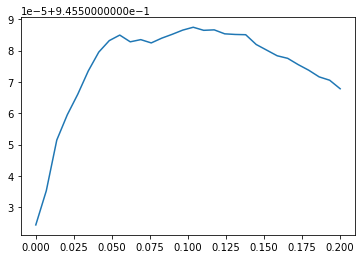

In [157]:
# from sklearn.linear_model import LogisticRegression as LR
# c = np.linspace(0.0001,0.2,30)
# test_scores=[]
# for C in c:
#     lr = LR(penalty = "l2",C=C)
#     test_score = cross_val_score(lr, train_stack, train_label, cv=5, scoring='roc_auc')
#     test_scores.append(np.mean(test_score))
    
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(c,test_scores)

In [158]:
lr = LR(penalty='l2',C=0.105)
lr.fit(train_stack, train_label)
test_predict = lr.predict_proba(test_stack)[:,1]
train_predict = lr.predict_proba(train_stack)[:,1]

In [160]:
test['LABEL']=test_predict

In [161]:
a=test[['CUST_UID','LABEL']]

,CUST_UID,LABEL
0,f5dcfe9b9e8d496d893cfcba8fcac1d4,0.035942
1,68883d45646d44d8b851476058e4500d,0.033266
2,2b93dfa58f10463a937cd42cc42e54f7,0.089724
3,94fc13e16dac4642ab7544d8889e8579,0.032965
4,6be5af4911964a31a0b5cf115799ace6,0.575420
...,...,...
11995,01d799cc3246416387f2ff9a1468ede1,0.265831
11996,55dba67ea8eb464a810c4fea9331e443,0.051709
11997,527e025840b14373890844a1138197ab,0.296675
11998,89a4e87c9a764c6c9eafda790c76a4e6,0.039448


In [162]:
a.to_csv('result/stack_all.txt', sep=' ', index=False, header=None)